In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *
import subprocess
import cv2
import dlib
import numpy as np
import random
import face_recognition
import face_recognition_models
bs=8
import torch
torch.cuda.is_available()
torch.cuda.set_device(0)


In [14]:
## Declaring path of dataset
path_img = Path('/root/model_training/intern_images')

## applying transforms
#tfms_list = [rotate(degrees=270, p=1),jitter(magnitude=(random.randrange(-3,3)/100), p=0.25), 
#            contrast(scale=(0.5, 2.), p=0.5), brightness(change=(0.1, 0.9), p=0.5)]
tfms_list = [rotate(degrees=270, p=1)]
tfms = [tfms_list, tfms_list]

## Loading data 
data = ImageDataBunch.from_folder(path=path_img, train='/', valid_pct=0.07, ds_tfms=tfms, bs=bs, size=(540,720))

## Normalizing data based on ImageNet parameters
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (153 items)
x: ImageList
Image (3, 540, 720),Image (3, 540, 720),Image (3, 540, 720),Image (3, 540, 720),Image (3, 540, 720)
y: CategoryList
sam,sam,sam,sam,sam
Path: /root/model_training/intern_images;

Valid: LabelList (11 items)
x: ImageList
Image (3, 540, 720),Image (3, 540, 720),Image (3, 540, 720),Image (3, 540, 720),Image (3, 540, 720)
y: CategoryList
max,karen,karen,karen,max
Path: /root/model_training/intern_images;

Test: None

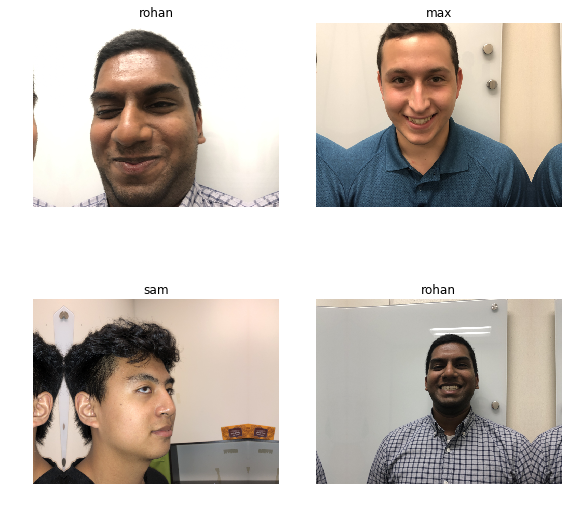

In [15]:
data.show_batch(rows=2)

In [16]:
print(data.classes)
len(data.classes),data.c

['bilal', 'harshita', 'karen', 'max', 'rohan', 'sam']


(6, 6)

In [20]:
detector = dlib.get_frontal_face_detector
for file_name in data.items:
    image = cv2.imread(file_name)
    print("/")

TypeError: bad argument type for built-in operation

In [ ]:
def get_ex(): return open_image(path_img/'max/max_001.JPG')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]


In [ ]:
## To create a ResNET 50 with pretrained weights
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
print(learn)

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
print('Training results:  ' + str(learn.validate(learn.data.train_dl)))

In [ ]:
print('Validation results: ' + str(learn.validate(learn.data.valid_dl)))

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(5,5))

In [ ]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [ ]:
learn.lr_find()
learn.recorder.plot()